Load the tips dataset from either pydataset or seaborn.

In [3]:
from pydataset import data 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from math import sqrt 
import warnings
warnings.filterwarnings('ignore')
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import f_regression

df = data('tips')
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill. You may follow these steps to do that:

- import the method from statsmodels: from statsmodels.formula.api import ols
- fit the model to your data, where x = total_bill and y = tip: regr = ols('y ~ x', data=df).fit()
- compute yhat, the predictions of tip using total_bill: df['yhat'] = regr.predict(df.x)
- Create a file evaluate.py that contains the following functions.


In [4]:
x = df.total_bill
y = df.tip

In [5]:
regr = ols('tip ~ total_bill', data=df).fit()
df['yhat'] = regr.predict(pd.DataFrame(x))
regr.summary()
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822


Write a function, plot_residuals(x, y, dataframe) that takes the feature, the target, and the dataframe as input and returns a residual plot. (hint: seaborn has an easy way to do this!)

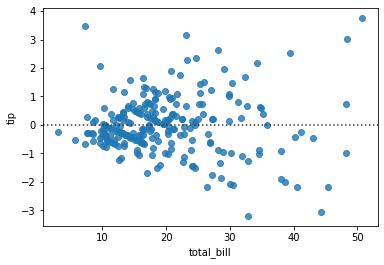

In [13]:
sns.residplot(x, y, df)

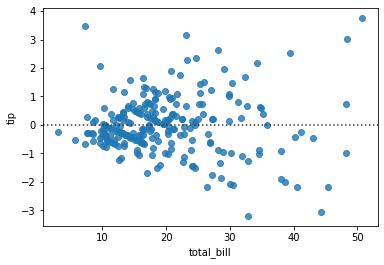

In [6]:
def plot_residuals(x, y, df):
    return sns.residplot(x, y, df)

plot_residuals(x, y, df)

Write a function, regression_errors(y, yhat), that takes in y and yhat, returns the sum of squared errors (SSE), explained sum of squares (ESS), total sum of squares (TSS), mean squared error (MSE) and root mean squared error (RMSE).

In [15]:
MSE = mean_squared_error(y, df.yhat)
MSE

1.036019442011377

In [16]:
SSE = MSE*len(df)
SSE

252.788743850776

In [17]:
RMSE = sqrt(MSE)
RMSE

1.0178504025697377

In [18]:
ESS = sum((df.yhat - y.mean())**2)
ESS

212.4237331984042

In [19]:
TSS = SSE + ESS
TSS

465.21247704918017

Write a function that takes in y and yhat and returns SSE, MSE, ESS, TSS, and RMSE

In [23]:
def regression_errors(y, yhat):
    MSE = mean_squared_error(y, df.yhat)
    SSE = MSE*len(df)
    RMSE = sqrt(MSE)
    ESS = sum((df.yhat - y.mean())**2)
    TSS = SSE + ESS
    return  SSE, ESS, TSS, MSE, RMSE  

regression_errors(y, df.yhat)

(252.788743850776,
 212.4237331984042,
 465.21247704918017,
 1.036019442011377,
 1.0178504025697377)

Write a function, baseline_mean_errors(y), that takes in your target, y, computes the SSE, MSE & RMSE when yhat is equal to the mean of all y, and returns the error values (SSE, MSE, and RMSE).

In [27]:
MSE_fnc = mean_squared_error(y, df.yhat)
MSE_fnc

1.036019442011377

In [28]:
SSE_fnc = MSE_fnc*len(df)
SSE_fnc

252.788743850776

In [29]:
RMSE_fnc = sqrt(MSE_fnc)
RMSE_fnc

1.0178504025697377

Write a function that takes in y and refurns baseline SSE, MSE, and RMSE

In [31]:
def baseline_mean_errors(y):
    MSE_fnc = mean_squared_error(y, df.yhat)
    SSE_fnc = MSE_fnc*len(df)
    RMSE_fnc = sqrt(MSE_fnc)
    return SSE_fnc, MSE_fnc, RMSE_fnc

baseline_mean_errors(y)

(252.788743850776, 1.036019442011377, 1.0178504025697377)

In [ ]:
# df_base = df
# df_base.head()
# df_base['yhat'] = (y).mean()
# df_base['residual'] = df_base['yhat'] - y
# df_base['residual_2'] = df_base['residual']**2

Write a function, better_than_baseline(SSE), that returns true if your model performs better than the baseline, otherwise false.

Use regression errors and baseline mean errors SSE and SSE_fnc for function that takes in SSE, SSE_fnc and returns a boolean value True or False if the baseline mean is better or not.

In [12]:
def better_than_baseline(SSE, SSE_fnc):
    SSE = ((df.yhat - y) ** 2).sum()
    SSE_fnc = ((y.mean() - y)** 2).sum()
    return SSE < SSE_fnc

better_than_baseline(SSE, SSE_fnc)

Write a function, model_significance(ols_model), that takes the ols model as input and returns the amount of variance explained in your model, and the value telling you whether the correlation between the model and the tip value are statistically significant.

In [ ]:
r2 = ols_model.rsquared
pval = ols_model.f_pvalue

In [11]:
def model_significance(ols_model):
    r2 = ols_model.rsquared
    pval = ols_model.f_pvalue
    return r2, pval
    
model_significance(ols_model)